In [1]:
from get_station_info_library import *
from read_allan_index import *
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = '../Allan_Features/mex_dataset/Phobos/GR035/GR035.vix'
ground_station_data = extract_ground_station_dict(file_path)
if ground_station_data:
    print("Ground Station Dictionary:")
    print(ground_station_data)
else:
    print("Ground Station Section Not Found.")

end
Ground Station Dictionary:
{'CEDUNA': {'site_type': 'fixed', 'site_ID': 'Cd', 'elev': '164.62', 'long': '-133:48:35.', 'lat': '-31:52:03.7'}, 'HOBART12': {'site_type': 'fixed', 'site_ID': 'Hb', 'elev': '40.98', 'long': '-147:26:17.', 'lat': '-42:48:20.1', 'site_velocity': '0.000000'}, 'YARRA12M': {'site_type': 'fixed', 'site_ID': 'Yg', 'elev': '248.24', 'long': '-115:20:44.', 'lat': '-29:02:49.7', 'site_velocity': '0.000000'}, 'KATH12M': {'site_type': 'fixed', 'site_ID': 'Ke', 'elev': '189.16', 'long': '-132:09:08.', 'lat': '-14:22:31.7', 'site_velocity': '0.000000'}, 'WARK': {'site_type': 'fixed', 'site_ID': 'Ww', 'elev': '127.89', 'long': '-174:39:47.', 'lat': '-36:26:05.3', 'site_velocity': '0.000000'}, 'YAMAGU32': {'site_type': 'fixed', 'site_ID': 'Ym', 'elev': '165.62', 'long': '-131:33:25.', 'lat': '34:12:57.7'}, 'TIANMA65': {'site_type': 'fixed', 'site_ID': 'T6', 'elev': '49.16', 'long': '-121:08:09.', 'lat': '31:05:31.6'}, 'KUNMING': {'site_type': 'fixed', 'site_ID': 'Km', 

Allan Index not found or could not be read.


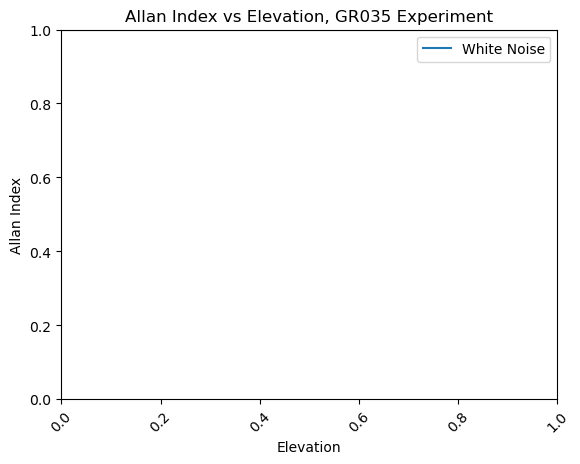

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

mex_dataset_path = './mex_dataset/Phobos/GR035'
allan_index_list = []
site_ID_file_list = []
elev_list = []

files = './mex_dataset/gr035/complete/Fdets.mex.2013.12.28.On.complete.r2i.txt'
# Step 1: Collect data from files
for file in os.listdir(mex_dataset_path):
    if os.path.isdir(os.path.join(mex_dataset_path, file)):
        try:
            allan_index_path = os.path.join(mex_dataset_path, file, 'allan_index.txt')
            if os.path.exists(allan_index_path):
                allan_index = read_allan_index(allan_index_path)
                if allan_index is not None:
                    allan_index_list.append(float(allan_index))
                    site_ID_file = allan_index_path.split('/')[-2].split('.')[-3]
                    site_ID_file_list.append(site_ID_file)
            else:
                print("Allan Index not found or could not be read.")
        except:
            continue

# Step 2: Process elevations and collect indices with errors
i_list = []  # List to store indices of elements to remove
for i, site_ID_file in enumerate(site_ID_file_list):
    try:
        site = ID_to_site(site_ID_file)
        elev = ground_station_data[site]['elev']
        elev_list.append(float(elev))
    except Exception as e:
        elev_list.append(float(elev))
        i_list.append(i)  # Collect indices with errors

# Step 3: Reverse iterate to remove elements without modifying other indices
for i in reversed(i_list):  # Iterate in reverse to avoid shifting indices
    print(f"Removing index {i} from lists due to error")
    allan_index_list.pop(i)
    site_ID_file_list.pop(i)
    elev_list.pop(i)

# Step 4: Plotting
indexes = np.sort(elev_list)

for i in range(len(site_ID_file_list)):
    plt.scatter(elev_list[i], allan_index_list[i], label=site_ID_file_list[i])

#plt.title('Allan Index vs Elevation, GR035 Experiment')
plt.title('Allan Index vs Elevation, GR035 Experiment')
plt.xlabel('Elevation')
plt.ylabel('Allan Index')
plt.axhline(1, label = 'White Noise')
plt.xticks(fontsize=10, rotation=45)
plt.legend()
plt.show()

In [17]:
len(site_ID_file_list)

15

In [18]:
len(elev_list)

13

In [19]:
len(allan_index_list)

15